# Data Analysis (EDA and Model Training)

### Authors: Artem Klasberg & David Crespo Gonzalez

#### Date: April 2025

### Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

### Import File

In [ ]:
df = pd.read_csv("C:/Users/artkl/OneDrive/Uni/TFG/DataAnalysis/sp500_financial_dataset.csv")

### Initial Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462 entries, 0 to 2461
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         2462 non-null   object 
 1   Company Name                   2462 non-null   object 
 2   Industry                       2462 non-null   object 
 3   Sector                         2462 non-null   object 
 4   Year                           2462 non-null   int64  
 5    Market Cap                    2443 non-null   float64
 6    Tangible Book Value           1917 non-null   float64
 7    Goodwill                      1780 non-null   object 
 8    Other Intangible Assets       1650 non-null   float64
 9   Multiplier                     2462 non-null   float64
 10  Data Value                     2462 non-null   object 
 11  Data Value as % of Market Cap  2462 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage:

In [6]:
df.describe()

,Year,Market Cap,Tangible Book Value,Other Intangible Assets,Multiplier
count,2462.000000,2.443000e+03,1.917000e+03,1.650000e+03,2462.000000
mean,2022.061738,7.526596e+10,7.545079e+09,4.106791e+09,0.180834
std,1.412002,2.045573e+11,3.058206e+10,1.046893e+10,0.070262
min,2020.000000,1.693399e+09,-7.609600e+10,-3.990000e+08,0.162500
25%,2021.000000,1.660453e+10,-1.956200e+09,3.242000e+08,0.162500
50%,2022.000000,2.987818e+10,1.875418e+09,1.160000e+09,0.162500
75%,2023.000000,6.221305e+10,9.149000e+09,3.444450e+09,0.162500
max,2025.000000,3.410000e+12,2.800000e+11,1.450000e+11,0.450000


In [7]:
df.dtypes

# Here we can see the data types of each column, we can see that some columns have incorrect data types.
# We can also see that some column names have a space that needs to be trimmed.

Ticker                            object
Company Name                      object
Industry                          object
Sector                            object
Year                               int64
 Market Cap                      float64
 Tangible Book Value             float64
 Goodwill                         object
 Other Intangible Assets         float64
Multiplier                       float64
Data Value                        object
Data Value as % of Market Cap     object
dtype: object

In [8]:
df.columns = df.columns.str.strip() # Trim whitespace

In [9]:
cols_to_float = ['Goodwill', 'Data Value', 'Data Value as % of Market Cap']

for col in cols_to_float:
    if col in df.columns:
        # Clean common symbols and REGEX
        df[col] = df[col].astype(str).str.replace('[$,%]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
print(df[cols_to_float].dtypes) # confirm change

Goodwill                         float64
Data Value                       float64
Data Value as % of Market Cap    float64
dtype: object


In [11]:
df.sample(5) # Verify data is correct

,Ticker,Company Name,Industry,Sector,Year,Market Cap,Tangible Book Value,Goodwill,Other Intangible Assets,Multiplier,Data Value,Data Value as % of Market Cap
2161,TSLA,"Tesla, Inc.",Auto Manufacturers,Consumer Cyclical,2024,1.340000e+12,7.245400e+10,2.440000e+08,9.820000e+08,0.1625,2.059280e+11,0.1539
1393,LVS,Las Vegas Sands Corp.,Resorts & Casinos,Consumer Cyclical,2021,2.633374e+10,NaN,NaN,1.900000e+07,0.1625,4.282320e+09,0.1626
1708,NVR,"NVR, Inc.",Residential Construction,Consumer Cyclical,2021,1.740702e+10,3.002378e+09,NaN,NaN,0.1625,2.340754e+09,0.1345
1805,PEP,"PepsiCo, Inc.",Beverages - Non-Alcoholic,Consumer Defensive,2024,2.060000e+11,-1.416400e+10,1.753400e+10,1.480100e+10,0.1625,4.102369e+10,0.1992
1286,JKHY,"Jack Henry & Associates, Inc.",Information Technology Services,Technology,2020,1.253812e+10,NaN,NaN,NaN,0.4500,5.642154e+09,0.4500


In [12]:
print("Missing values:")
print(df.isnull().sum()) # count na

Missing values:
Ticker                             0
Company Name                       0
Industry                           0
Sector                             0
Year                               0
Market Cap                        19
Tangible Book Value              545
Goodwill                         685
Other Intangible Assets          812
Multiplier                         0
Data Value                         5
Data Value as % of Market Cap     19
dtype: int64


In [13]:
df.dropna(inplace=True) # drop na

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 2460
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         1572 non-null   object 
 1   Company Name                   1572 non-null   object 
 2   Industry                       1572 non-null   object 
 3   Sector                         1572 non-null   object 
 4   Year                           1572 non-null   int64  
 5   Market Cap                     1572 non-null   float64
 6   Tangible Book Value            1572 non-null   float64
 7   Goodwill                       1572 non-null   float64
 8   Other Intangible Assets        1572 non-null   float64
 9   Multiplier                     1572 non-null   float64
 10  Data Value                     1572 non-null   float64
 11  Data Value as % of Market Cap  1572 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 159.

### Data Visualization

#### Data Value and Data Value % distribution

Text(0, 0.5, 'Frequency')

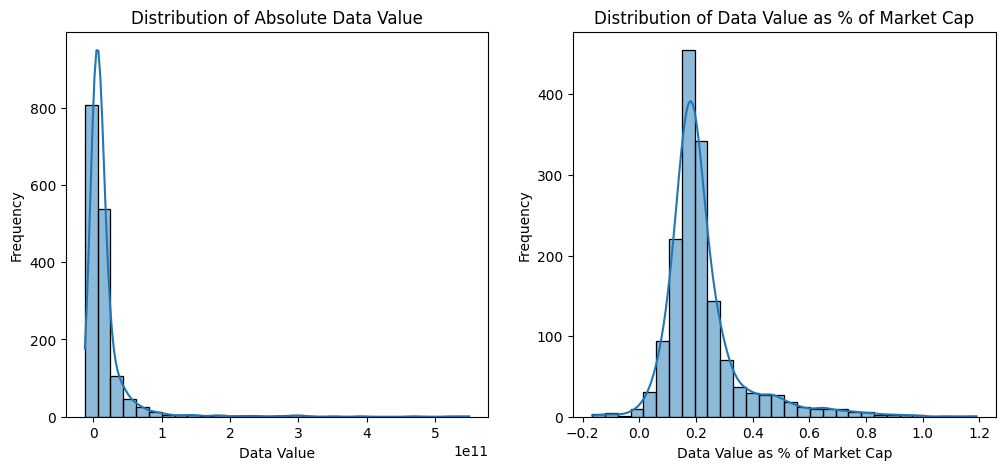

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['Data Value'].dropna(), kde=True, bins=30)
plt.title('Distribution of Absolute Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['Data Value as % of Market Cap'].dropna(), kde=True, bins=30)
plt.title('Distribution of Data Value as % of Market Cap')
plt.xlabel('Data Value as % of Market Cap')
plt.ylabel('Frequency')

#### Data Value vs Market Cap (Log scale)

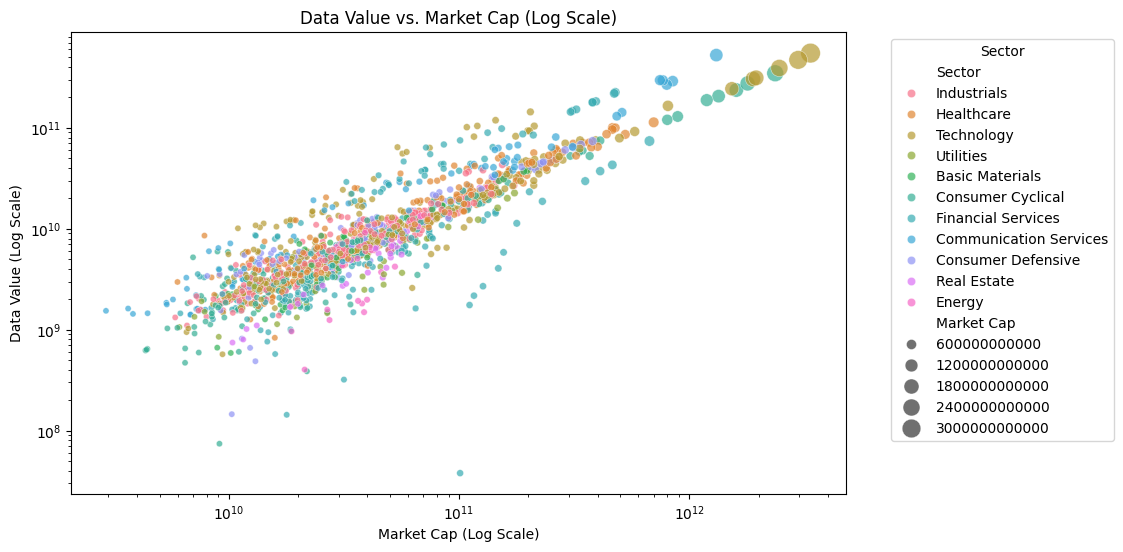

In [16]:
plt.figure(figsize=(10, 6))
positive_df = df[(df['Market Cap'] > 0) & (df['Data Value'] > 0)]

sns.scatterplot(data=positive_df, x='Market Cap', y='Data Value', hue='Sector', alpha=0.7, size='Market Cap', sizes=(20, 200))
plt.xscale('log') # Use log scale for better visibility if values span orders of magnitude
plt.yscale('log') # Use log scale
plt.title('Data Value vs. Market Cap (Log Scale)')
plt.xlabel('Market Cap (Log Scale)')
plt.ylabel('Data Value (Log Scale)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left') # outside legend
plt.show()

#### Data Value % per Sectors

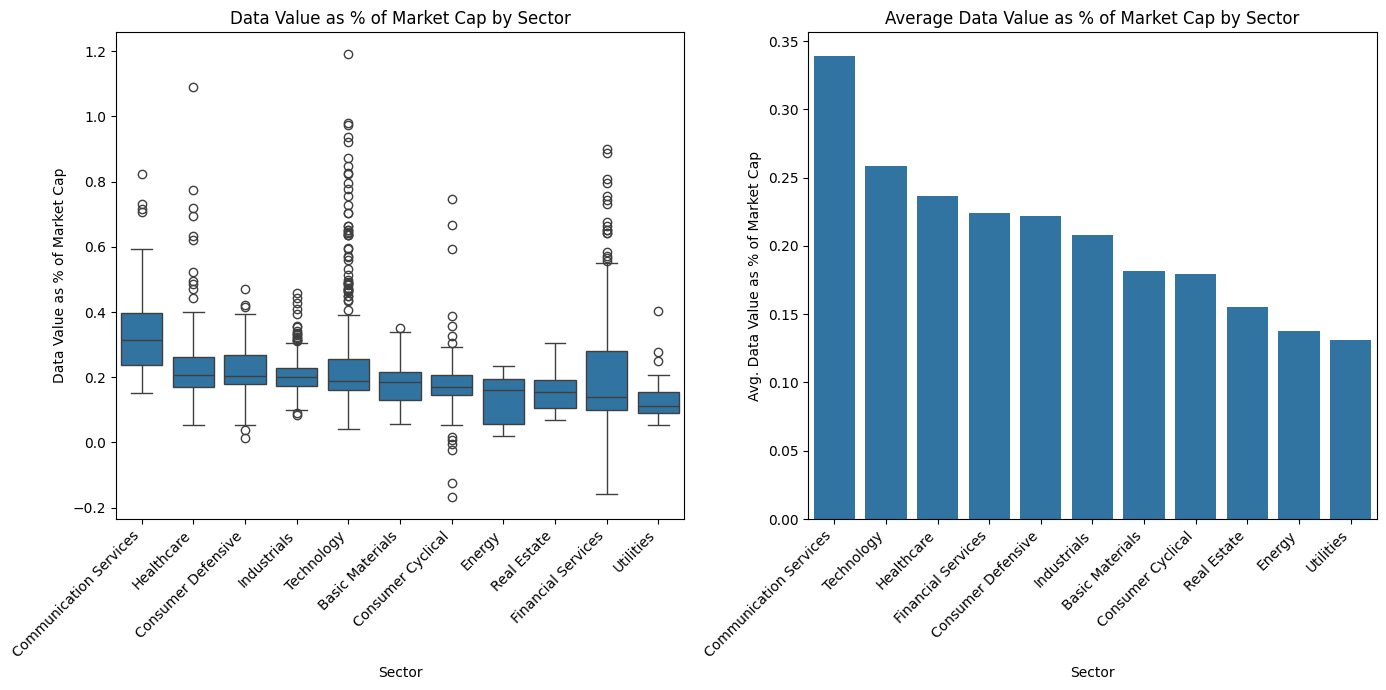

In [17]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sector_order = df.groupby('Sector')['Data Value as % of Market Cap'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Sector', y='Data Value as % of Market Cap', order=sector_order)
plt.title('Data Value as % of Market Cap by Sector')
plt.xlabel('Sector')
plt.ylabel('Data Value as % of Market Cap')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap

plt.subplot(1, 2, 2)
sector_avg_order = df.groupby('Sector')['Data Value as % of Market Cap'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Sector', y='Data Value as % of Market Cap', order=sector_avg_order, estimator=np.mean, errorbar=None) # Use mean
plt.title('Average Data Value as % of Market Cap by Sector')
plt.xlabel('Sector')
plt.ylabel('Avg. Data Value as % of Market Cap')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
import joblib

print("pandas:", pd.__version__)
print("yfinance:", yf.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("joblib:", joblib.__version__)


pandas: 2.2.2
yfinance: 0.2.54
matplotlib: 3.8.4
seaborn: 0.13.2
numpy: 1.26.4
scikit-learn: 1.5.1
joblib: 1.4.0


### Additional EDA and preprocessing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
target = 'Data Value'
drop_cols = ['Ticker', 'Company Name', 'Data Value as % of Market Cap', target]

In [20]:
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df[target]

In [21]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = [col for col in ['Industry', 'Sector'] if col in X.columns]

In [22]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

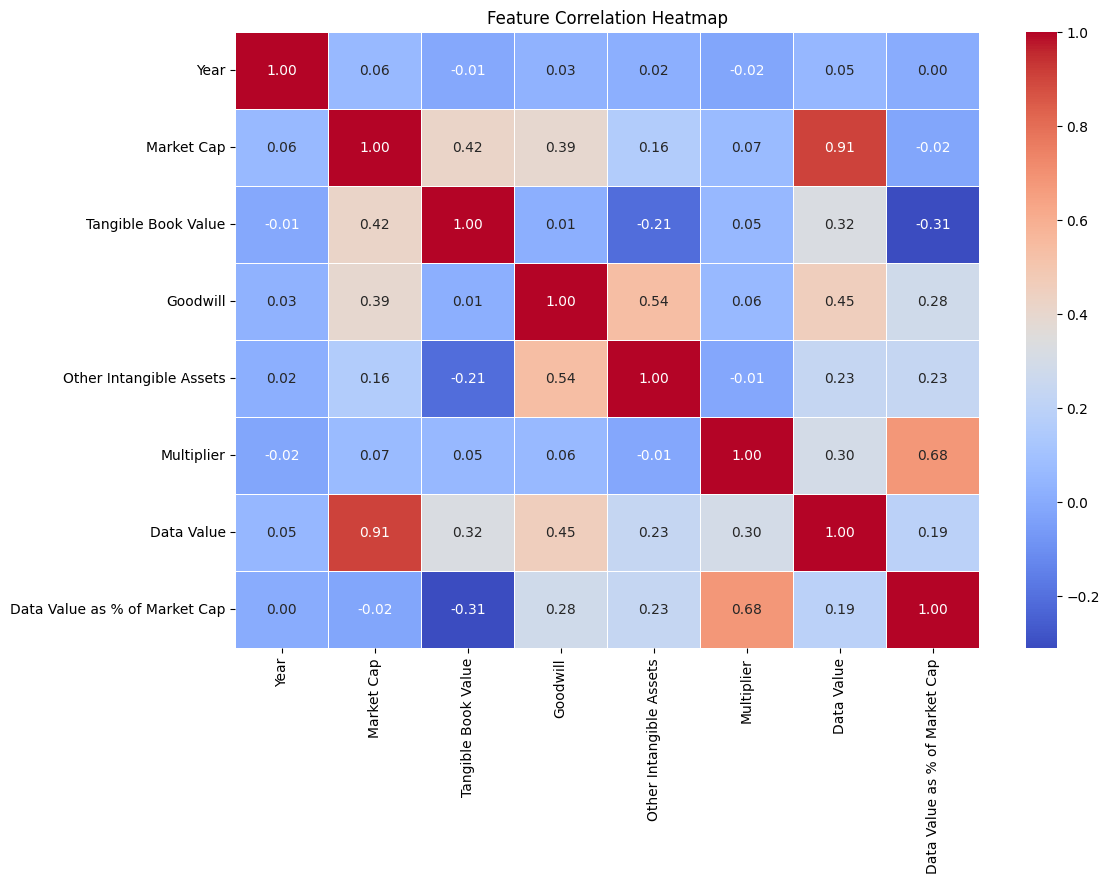

In [23]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [25]:
models = {
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=1.0, random_state=42, max_iter=10000),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}

In [26]:
results = {}
feature_importance_df = None

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Only extract feature importances for Random Forest
    if name == 'Random Forest':
        # Get feature names
        feature_names_num = numeric_features
        feature_names_cat = pipe.named_steps['preprocessor'] \
                                 .named_transformers_['cat'] \
                                 .get_feature_names_out(categorical_features)
        all_feature_names = feature_names_num + feature_names_cat.tolist()
        
        importances = pipe.named_steps['model'].feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': all_feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

c:\Users\artkl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.204e+22, tolerance: 2.028e+20
  model = cd_fast.enet_coordinate_descent(


#### Additional plots after model training

C:\Users\artkl\AppData\Local\Temp\ipykernel_5576\2988030884.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="viridis")


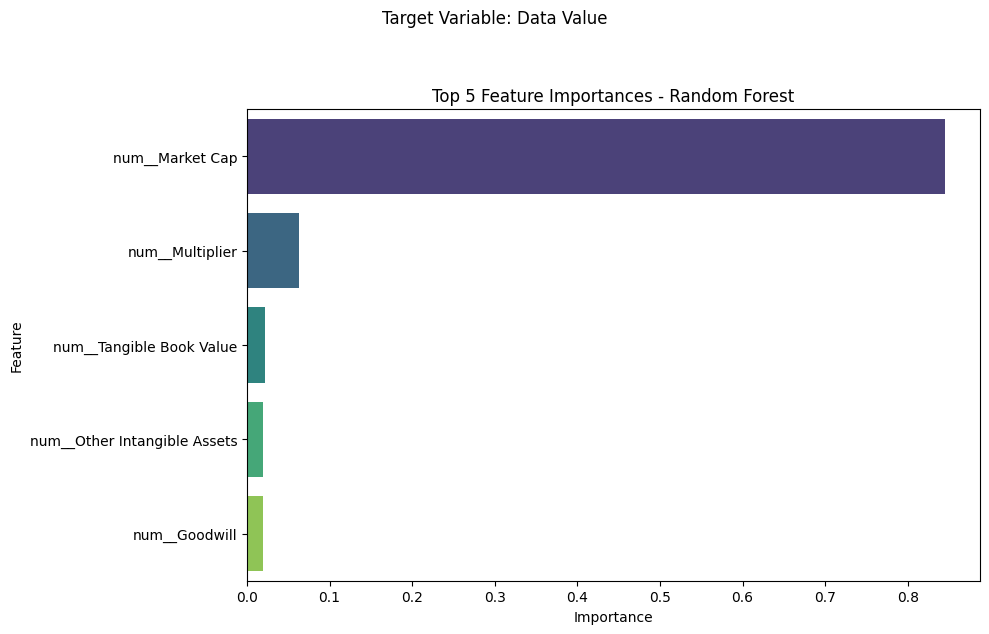

In [27]:
# Fit the pipeline and get model after train
rf_model = models['Random Forest']
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])
rf_pipe.fit(X_train, y_train)

trained_rf = rf_pipe.named_steps['model']
feature_names = rf_pipe.named_steps['preprocessor'].get_feature_names_out()
importances = trained_rf.feature_importances_

# df creation
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 5 Feature Importances - Random Forest")
plt.suptitle("Target Variable: Data Value", fontsize=12, y=1.05)  # Adjust y for positioning

plt.tight_layout()
plt.show()

In [28]:
pd.DataFrame(results).T.round(4).sort_values(by='R2', ascending=False)

,MAE,RMSE,R2
Random Forest,1.526196e+09,6.966671e+09,0.9642
Lasso,3.397622e+09,1.142169e+10,0.9037
Gradient Boosting,2.129600e+09,1.152959e+10,0.9019
Ridge,3.438065e+09,1.161540e+10,0.9004


### Model Performance

C:\Users\artkl\AppData\Local\Temp\ipykernel_5576\2425636681.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y=sorted_r2.index, data=sorted_r2, palette='viridis', ax=axes[0])
C:\Users\artkl\AppData\Local\Temp\ipykernel_5576\2425636681.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y=sorted_rmse.index, data=sorted_rmse, palette='viridis', ax=axes[1])
C:\Users\artkl\AppData\Local\Temp\ipykernel_5576\2425636681.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y=sorted_mae.index, data=sorted_mae, palette=

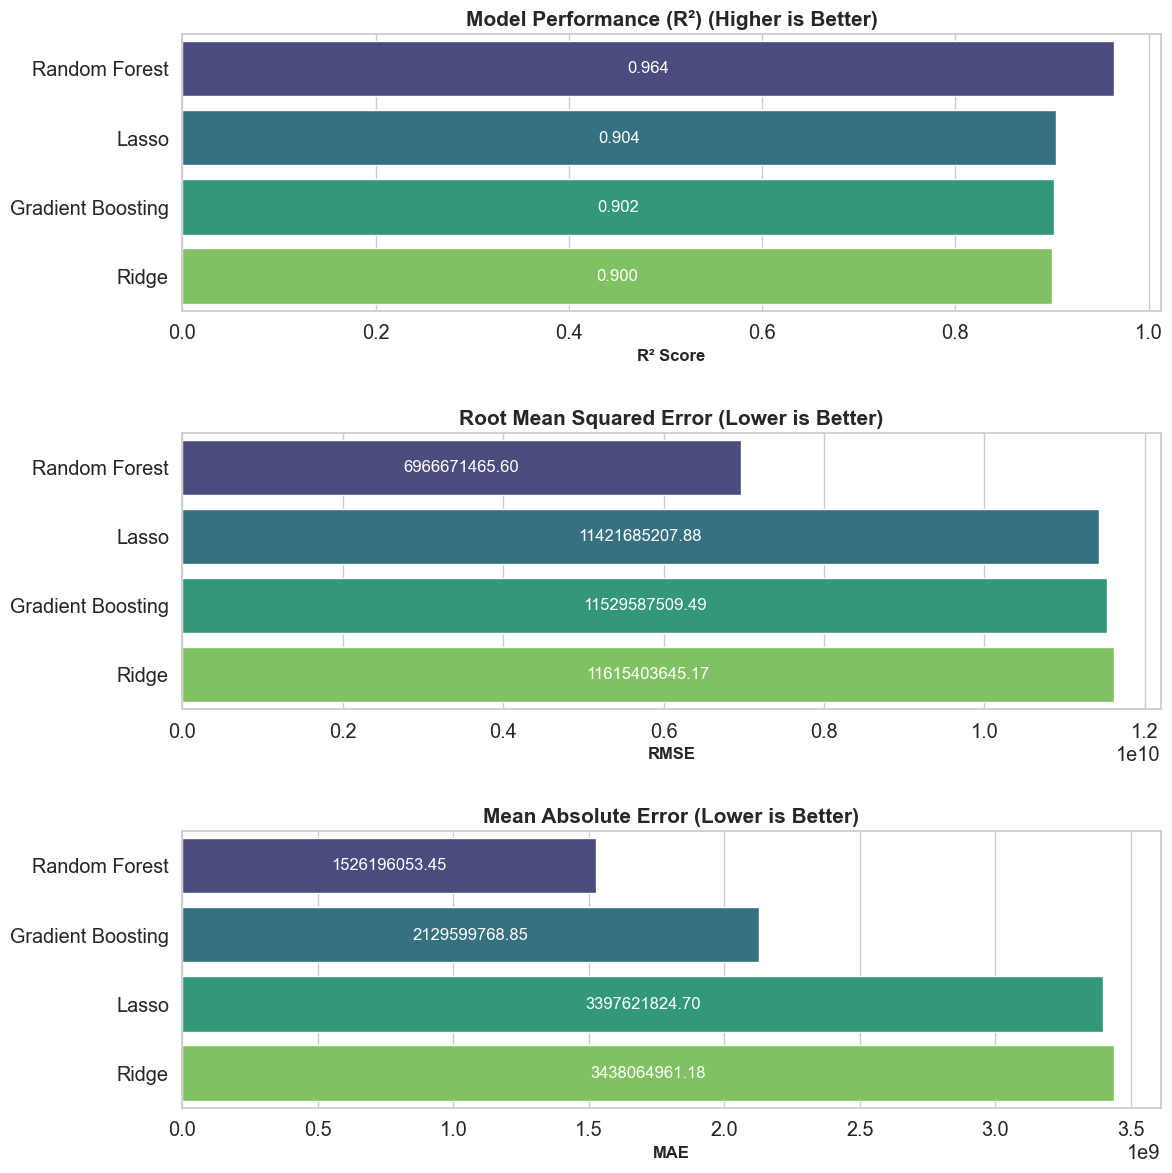

In [39]:
sns.set(style="whitegrid", font_scale=1.3)

results_df = pd.DataFrame(results).T
results_df['R2'] = pd.to_numeric(results_df['R2'])
results_df['RMSE'] = pd.to_numeric(results_df['RMSE'])
results_df['MAE'] = pd.to_numeric(results_df['MAE'])

sorted_r2 = results_df.sort_values(by='R2', ascending=False)
sorted_rmse = results_df.sort_values(by='RMSE', ascending=True)
sorted_mae = results_df.sort_values(by='MAE', ascending=True)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))  # Vertical layout

# --- R2 Plot ---
sns.barplot(x='R2', y=sorted_r2.index, data=sorted_r2, palette='viridis', ax=axes[0])
axes[0].set_title("Model Performance (R²) (Higher is Better)", fontsize=15, weight='bold')
axes[0].set_xlabel("R² Score", fontsize=12, weight='bold')
axes[0].set_ylabel("")
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.3f", fontsize=12, label_type='center', color='white')

# --- RMSE Plot ---
sns.barplot(x='RMSE', y=sorted_rmse.index, data=sorted_rmse, palette='viridis', ax=axes[1])
axes[1].set_title("Root Mean Squared Error (Lower is Better)", fontsize=15, weight='bold')
axes[1].set_xlabel("RMSE", fontsize=12, weight='bold')
axes[1].set_ylabel("")
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.2f", fontsize=12, label_type='center', color='white')

# --- MAE Plot ---
sns.barplot(x='MAE', y=sorted_mae.index, data=sorted_mae, palette='viridis', ax=axes[2])
axes[2].set_title("Mean Absolute Error (Lower is Better)", fontsize=15, weight='bold')
axes[2].set_xlabel("MAE", fontsize=12, weight='bold')
axes[2].set_ylabel("")
for container in axes[2].containers:
    axes[2].bar_label(container, fmt="%.2f", fontsize=12, label_type='center', color='white')

plt.tight_layout(h_pad=2)
plt.show()


#### Get all stats in one place + model time and size

In [30]:
import time
import joblib
import os

for name, model in models.items():
    start_time = time.time() #start time
    
    # fit pipe
    pipe = Pipeline([('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    # Measure training time
    training_time = time.time() - start_time
    
    # Save model
    model_filename = f'{name}_model.pkl'
    joblib.dump(pipe, model_filename)
    model_size_bytes = os.path.getsize(model_filename)  # File size in bytes
    
    # Convert to MB
    model_size_mb = model_size_bytes / (1024 * 1024)
    
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'Training Time (seconds)': training_time,
        'Model Size (MB)': model_size_mb
    }
    
    # remove model
    os.remove(model_filename)

# Results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"MAE: {metrics['MAE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R2: {metrics['R2']}")
    print(f"Training Time: {round(metrics['Training Time (seconds)'], 2)} seconds")
    print(f"Model Size: {metrics['Model Size (MB)']:.4f} MB")

c:\Users\artkl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.204e+22, tolerance: 2.028e+20
  model = cd_fast.enet_coordinate_descent(



Ridge:
MAE: 3438064961.184702
RMSE: 11615403645.16816
R2: 0.9004012027857116
Training Time: 0.01 seconds
Model Size: 0.0073 MB

Lasso:
MAE: 3397621824.69579
RMSE: 11421685207.881824
R2: 0.9036956612398953
Training Time: 0.6 seconds
Model Size: 0.0074 MB

Random Forest:
MAE: 1526196053.4450188
RMSE: 6966671465.5961485
R2: 0.9641708799750189
Training Time: 0.15 seconds
Model Size: 10.9325 MB

Gradient Boosting:
MAE: 2129599768.8539798
RMSE: 11529587509.485968
R2: 0.9018674643628588
Training Time: 0.31 seconds
Model Size: 0.1839 MB
